# Приближенное решение задачи Коши для обыкновенного дифференциального уравнения

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
        <ol> 
            <li>Методами Эйлера, Рунге-Кутта четвертого порядка точности и методом Адамса третьего порядка найти приближенное
                решение задачи Коши для обыкновенного дифференциального уравнения на отрезке [0,1]. Шаг сетки h = 0,05. Начало
                расчета - точка x = 0. </li>
            <li>Используя расчет на грубой сетке с h = 0,1, найти оценку точности по Рунге для половины узлов подробной сетки
                (только для решения, полученного с четвертым порядком точности по методу Рунге-Кутты).</li>
        </ol> 
    <p>  Для сравнения приведено точное решение u0(x). </p>
    
$$
\begin{equation}
u'' + (tgx)u' + \frac{cos^2x}{4(1+sinx)^2}u = 1 + xtgx + \frac{x^2cos^2x}{8(1+sinx)^2}, \\
u(0)=1, \\ u'(0)=\frac{1}{2}, \\ u_0(x)=\frac{x^2}{2} + \sqrt{1+sinx} \\
\end{equation}
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# ИСХОДНЫЕ ДАННЫЕ

# правая часть ДУ, разрешимого относительно старшей производной 
def F(*args):
    return ((-1) * np.tan(args[0]) * args[2] - np.cos(args[0])**2 / (4 * (1 + np.sin(args[0]))**2) *args[1] + 
            1 + args[0] * np.tan(args[0]) + args[0]**2 * np.cos(args[0])**2 / (8 * (1 + np.sin(args[0]))**2))

# начальные условия для ДУ
u_0     = 1
u_der_0 = 1 / 2


# точное решение для анализа
def u(x):
    return x**2 / 2 + np.power(1 + np.sin(x), 1 / 2)


# интервал
a = 0
b = 1

In [3]:
# МЕТОДЫ РЕШЕНИЯ ОДУ 1-го порядка
# (с учетом приведения ОДУ 2-го порядка к нормальному виду)

# метод Эйлера (~O(h))
def Euler_method(x_plot, F, *args):
    
    h = x_plot[1] - x_plot[0]
    
    u_0 = args[0]
    w_0 = args[1]
    
    u_plot = [u_0]
    w_plot = [w_0]
    
    for i in range(len(x_plot) - 1):
        w = w_plot[i] + h * F(x_plot[i], u_plot[i], w_plot[i])
        u = u_plot[i] + h * w_plot[i]
        
        w_plot.append(w)
        u_plot.append(u)
    
    return u_plot
    
    
# метод Рунге-Кутта (~O(h^4))
def Runge_Kutta_method(x_plot, F, *args):
    
    h = x_plot[1] - x_plot[0]
    
    u_0 = args[0]
    w_0 = args[1]
    
    u_plot = [u_0]
    w_plot = [w_0]
    
    for i in range(len(x_plot) - 1):
        k1_w = F(x_plot[i], u_plot[i], w_plot[i])
        k1_u = w_plot[i]
        
        k2_w = F(x_plot[i] + h / 2, u_plot[i] + h / 2 * k1_u, w_plot[i] + h / 2 * k1_w)
        k2_u = w_plot[i] + h / 2 * k1_w
        
        k3_w = F(x_plot[i] + h / 2, u_plot[i] + h / 2 * k2_u, w_plot[i] + h / 2 * k2_w)
        k3_u = w_plot[i] + h /2 * k2_w
        
        k4_w = F(x_plot[i] + h, u_plot[i] + h * k3_u, w_plot[i] + h * k3_w)
        k4_u = w_plot[i] + h * k3_w
        
        w = w_plot[i] + h / 6 * (k1_w + 2 * (k2_w + k3_w) + k4_w)
        u = u_plot[i] + h / 6 * (k1_u + 2 * (k2_u + k3_u) + k4_u)
        
        w_plot.append(w)
        u_plot.append(u)
    
    return u_plot
    
        
# метод Адамса (порядок 3)
def Adams_method(x_plot, F, *args):
    
    h = x_plot[1] - x_plot[0]
    
    u_0 = args[0]
    w_0 = args[1]
 
    u_plot = [u_0]
    w_plot = [w_0]
   
    # методом Рунге-Кутта находим еще 2*2 начальные точки (2 известно)
    for i in range(2):
        k1_w = F(x_plot[i], u_plot[i], w_plot[i])
        k1_u = w_plot[i]

        k2_w = F(x_plot[i] + h / 2, u_plot[i] + h / 2 * k1_u, w_plot[i] + h / 2 * k1_w)
        k2_u = w_plot[i] + h / 2 * k1_w

        k3_w = F(x_plot[i] + h / 2, u_plot[i] + h / 2 * k2_u, w_plot[i] + h / 2 * k2_w)
        k3_u = w_plot[i] + h /2 * k2_w

        k4_w = F(x_plot[i] + h, u_plot[i] + h * k3_u, w_plot[i] + h * k3_w)
        k4_u = w_plot[i] + h * k3_w

        w = w_plot[i] + h / 6 * (k1_w + 2 * (k2_w + k3_w) + k4_w)
        u = u_plot[i] + h / 6 * (k1_u + 2 * (k2_u + k3_u) + k4_u)

        w_plot.append(w)
        u_plot.append(u)
        
    # метод Адамса
    for i in range(len(x_plot) - 3):
        w = (w_plot[i + 2] + h * ( 23 / 12 * F(x_plot[i + 2], u_plot[i + 2], w_plot[i + 2]) - 
                                   4  / 3  * F(x_plot[i + 1], u_plot[i + 1], w_plot[i + 1]) + 
                                   5  / 12 * F(x_plot[i],     u_plot[i],     w_plot[i])))
        u =  u_plot[i + 2] + h * ( 23 / 12 * w_plot[i + 2] - 4 / 3 * w_plot[i + 1] + 5 / 12 * w_plot[i])
        
        w_plot.append(w)
        u_plot.append(u)
        
    return u_plot

### Задача 1 (численное решение)

In [4]:
# шаг сетки
h1 = 0.05

# построение сетки
x1_plot = np.linspace(a, b, round((b - a) / h1))

print("Size of range: ", len(x1_plot))
print(x1_plot)

Size of range:  20
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [5]:
# точные значения
u1_plot = [u(x) for x in x1_plot]
u1_plot

[1.0,
 1.0273515533527149,
 1.0567627276856408,
 1.088216033669011,
 1.1216944860654694,
 1.1571816154920227,
 1.1946614798247734,
 1.2341186752385325,
 1.275538346873674,
 1.3189061991228404,
 1.3642085055303756,
 1.411432118297633,
 1.4605644773875728,
 1.5115936192223478,
 1.5645081849678504,
 1.6192974283994872,
 1.6759512233437346,
 1.7344600706903188,
 1.794815104970167,
 1.8570081004945758]

In [6]:
Euler_plot = Euler_method      (x1_plot, F, u_0, u_der_0)
RK_plot    = Runge_Kutta_method(x1_plot, F, u_0, u_der_0)
Adams_plot = Adams_method      (x1_plot, F, u_0, u_der_0)

# Euler_plot
# RK_plot
Adams_plot

[1,
 1.0273515532308564,
 1.0567627274434306,
 1.0882158470203658,
 1.121694099779696,
 1.157181023306272,
 1.1946606736288832,
 1.2341176474654927,
 1.2755370903799723,
 1.3189047072174778,
 1.3642067719870121,
 1.411430137364735,
 1.4605622437982673,
 1.511591128203702,
 1.5645054322496135,
 1.6192944102222926,
 1.675947936466769,
 1.734456512398472,
 1.7948112730806771,
 1.8570039933631923]

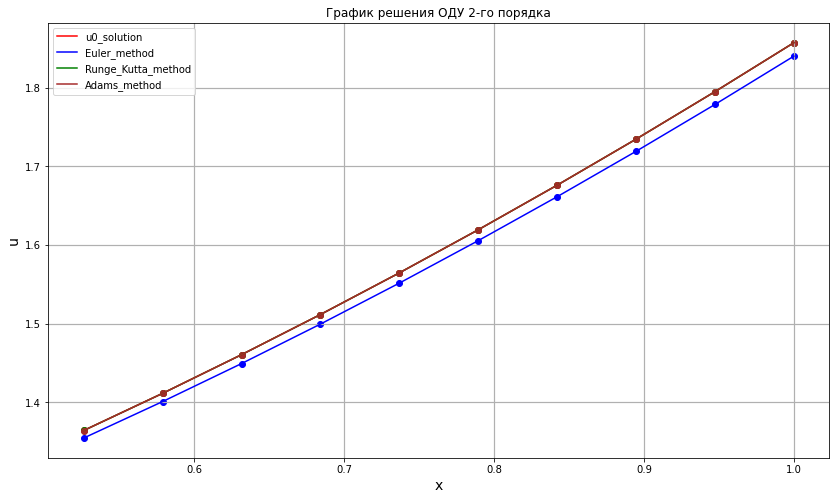

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

# ax.scatter(x1_plot, u1_plot, color="red")
# ax.plot(x1_plot, u1_plot, color="red", label='u')

# ax.scatter(x1_plot, Euler_plot, color="blue")
# ax.plot(x1_plot, Euler_plot, color="blue", label='Euler_method')

# ax.scatter(x1_plot, RK_plot, color="green")
# ax.plot(x1_plot, RK_plot, color="green", label='Runge_Kutta_method')

# ax.scatter(x1_plot, Adams_plot, color="brown")
# ax.plot(x1_plot, Adams_plot, color="brown", label='Adams_method')


ax.scatter(x1_plot[10:], u1_plot[10:], color="red")
ax.plot(x1_plot[10:], u1_plot[10:], color="red", label='u0_solution')

ax.scatter(x1_plot[10:], Euler_plot[10:], color="blue")
ax.plot(x1_plot[10:], Euler_plot[10:], color="blue", label='Euler_method')

ax.scatter(x1_plot[10:], RK_plot[10:], color="green")
ax.plot(x1_plot[10:], RK_plot[10:], color="green", label='Runge_Kutta_method')

ax.scatter(x1_plot[10:], Adams_plot[10:], color="brown")
ax.plot(x1_plot[10:], Adams_plot[10:], color="brown", label='Adams_method')

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("u", fontsize=14)

plt.title("График решения ОДУ 2-го порядка")
plt.legend()

plt.show()

In [8]:
Euler_errors = [abs(e - u)  for e, u  in zip(Euler_plot, u1_plot)]
RK_errors    = [abs(rk - u) for rk, u in zip(RK_plot, u1_plot)]
Adams_errors = [abs(a - u)  for a, u  in zip(Adams_plot, u1_plot)]

In [9]:
d_errors = {"x_plot":       x1_plot,
            "Euler_errors": Euler_errors,
            "RK_errors":    RK_errors,
            "Adams_errors": Adams_errors,
           }

df_errors = pd.DataFrame(data=d_errors)
df_errors

,x_plot,Euler_errors,RK_errors,Adams_errors
0,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.052632,0.001036,1.218585e-10,1.218585e-10
2,0.105263,0.002054,2.422103e-10,2.422103e-10
3,0.157895,0.003053,3.545106e-10,1.866486e-07
4,0.210526,0.004035,4.534479e-10,3.862858e-07
5,0.263158,0.004999,5.347591e-10,5.921858e-07
6,0.315789,0.005946,5.950813e-10,8.061959e-07
7,0.368421,0.006876,6.318270e-10,1.027773e-06
8,0.421053,0.007790,6.430860e-10,1.256494e-06
9,0.473684,0.008689,6.275414e-10,1.491905e-06


### Задача 2 (поправка Рунге)

In [10]:
def Runge_rule(u_plot_h0, u_plot_h1, p):
    runge_range = []
    
    for i in range(len(u_plot_h0)):
        n = 2 * i
        
        runge_elem = (u_plot_h1[n] - u_plot_h0[i]) / (np.power(2, p) - 1)
        runge_range.append(runge_elem)
        
    return runge_range

#### Поправка Рунге с заданным шагом

Поправка Рунге для метода Рунге-Кутта 4 порядка

In [11]:
# порядко метода Рунге-Кутта
p = 4

# шаг сетки
h2 = 0.1


# построение сетки
x2_plot = np.linspace(a, b, round((b - a) / h2))

x3_plot = []
for i in range(len(x2_plot) - 1):
    x3_plot.append(x2_plot[i])
    x3_plot.append((x2_plot[i] + x2_plot[i + 1]) / 2)
x3_plot.append(x2_plot[-1])

print("Size of range x2_plot: ", len(x2_plot))
print(x2_plot)

print("\nSize of range x3_plot: ", len(x3_plot))
print(x3_plot)

Size of range x2_plot:  10
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]

Size of range x3_plot:  19
[0.0, 0.05555555555555555, 0.1111111111111111, 0.16666666666666666, 0.2222222222222222, 0.2777777777777778, 0.3333333333333333, 0.38888888888888884, 0.4444444444444444, 0.5, 0.5555555555555556, 0.6111111111111112, 0.6666666666666666, 0.7222222222222221, 0.7777777777777777, 0.8333333333333333, 0.8888888888888888, 0.9444444444444444, 1.0]


In [12]:
# точные значения
u2_plot = [u(x) for x in x2_plot]
u2_plot

[1.0,
 1.0601570085096512,
 1.129407495073536,
 1.2075949198118956,
 1.2945732609443352,
 1.3902074653584287,
 1.4943738653331122,
 1.6069605601310215,
 1.727867761282316,
 1.8570081004945758]

In [13]:
RK_plot2 = Runge_Kutta_method(x2_plot, F, u_0, u_der_0)
RK_plot3 = Runge_Kutta_method(x3_plot, F, u_0, u_der_0)

In [14]:
runge_range = Runge_rule(RK_plot2, RK_plot3, p)
runge_range

[0.0,
 3.6311620377205145e-10,
 6.674907589617381e-10,
 8.594272256819598e-10,
 9.06278829759799e-10,
 7.909797113588486e-10,
 5.082504491345692e-10,
 6.173395128428183e-11,
 -5.385968560034371e-10,
 -1.2797448138239057e-09]

In [15]:
RK_plot_inc = []

for i in range(len(runge_range)):
    n = 2 * i
    RK_plot_inc.append(RK_plot3[n] + runge_range[i])

In [16]:
RK_errors     = [abs(rk - u)     for rk, u     in zip(RK_plot2, u2_plot)]
RK_errors_inc = [abs(rk_inc - u) for rk_inc, u in zip(RK_plot_inc, u2_plot)]

In [17]:
d_rk_errors = {"x_plot":        x2_plot,
               "RK_errors":     RK_errors,
               "RK_errors_inc": RK_errors_inc
              }

df_rk_errors = pd.DataFrame(data=d_rk_errors)
df_rk_errors

,x_plot,RK_errors,RK_errors_inc
0,0.000000,0.000000e+00,0.000000e+00
1,0.111111,5.765580e-09,4.427969e-11
2,0.222222,1.060327e-08,7.657852e-11
3,0.333333,1.365319e-08,9.764256e-11
4,0.444444,1.439298e-08,1.074816e-10
5,0.555556,1.255015e-08,1.055243e-10
6,0.666667,8.041410e-09,9.059731e-11
7,0.777778,9.270564e-10,6.068679e-11
8,0.888889,8.629886e-09,1.233635e-11
9,1.000000,2.041515e-08,6.077072e-11


#### Зависимость ошибки от шага после поправки Рунге

In [18]:
# порядок метода Рунге-Кутта
p = 4

# количество узлов сетки

node_min_count = 2
node_max_count = 100

In [19]:
# вычисление ошибок

h_plot      = []
errors_plot0 = []
errors_plot1 = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x0_plot, h = np.linspace(a, b, n, retstep=True)
    
    x1_plot = []
    for i in range(len(x0_plot) - 1):
        x1_plot.append(x0_plot[i])
        x1_plot.append((x0_plot[i] + x0_plot[i + 1]) / 2)
    x1_plot.append(x0_plot[-1])
    
    
    RK_plot0 = Runge_Kutta_method(x0_plot, F, u_0, u_der_0)
    RK_plot1 = Runge_Kutta_method(x1_plot, F, u_0, u_der_0)
    u_plot   = [u(x) for x in x0_plot]
    
    runge_range = Runge_rule(RK_plot0, RK_plot1, p)
    
    RK_plot_inc = []
    for i in range(len(runge_range)):
        n = 2 * i
        RK_plot_inc.append(RK_plot1[n] + runge_range[i])
    
    max_error0 = max([abs(rk - u) for rk, u in zip(RK_plot0, u_plot)])
    max_error1 = max([abs(rk - u) for rk, u in zip(RK_plot_inc, u_plot)])
    
    h_plot.append(h)
    errors_plot0.append(max_error0)
    errors_plot1.append(max_error1)

In [20]:
d_rk_rl_errors = {"h_plot":       h_plot,
                  "errors_plot0": errors_plot0,
                  "errors_plot1": errors_plot1
              }

df_rk_rl_errors = pd.DataFrame(data=d_rk_rl_errors)
df_rk_rl_errors

,h_plot,errors_plot0,errors_plot1
0,1.000000,2.494356e-04,2.285260e-05
1,0.090909,9.015079e-09,3.772671e-11
2,0.047619,6.528316e-10,1.337375e-12
3,0.032258,1.352849e-10,1.829648e-13
4,0.024390,4.383161e-11,4.440892e-14
5,0.019608,1.820943e-11,1.532108e-14
6,0.016393,8.864243e-12,5.995204e-15
7,0.014085,4.817702e-12,3.108624e-15
8,0.012346,2.837952e-12,1.998401e-15
9,0.010989,1.778799e-12,1.332268e-15


In [21]:
ln_h_plot       = np.log(h_plot)
ln_errors_plot0 = np.log(errors_plot0)
ln_errors_plot1 = np.log(errors_plot1)

In [22]:
ln_errors = [ln_errors_plot0, ln_errors_plot1]
b         = [0, 0]

for b_index in range(len(b)):
    
    for index in range(len(ln_h_plot)):
        b[b_index] += ln_h_plot[index] * ln_errors[b_index][index]
    b[b_index] *= len(ln_h_plot)
        
    b[b_index] -= (np.sum(ln_h_plot) * np.sum(ln_errors[b_index]))
    b[b_index] /= (len(ln_h_plot) * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))

b

[4.150392724610354, 5.259499996127774]

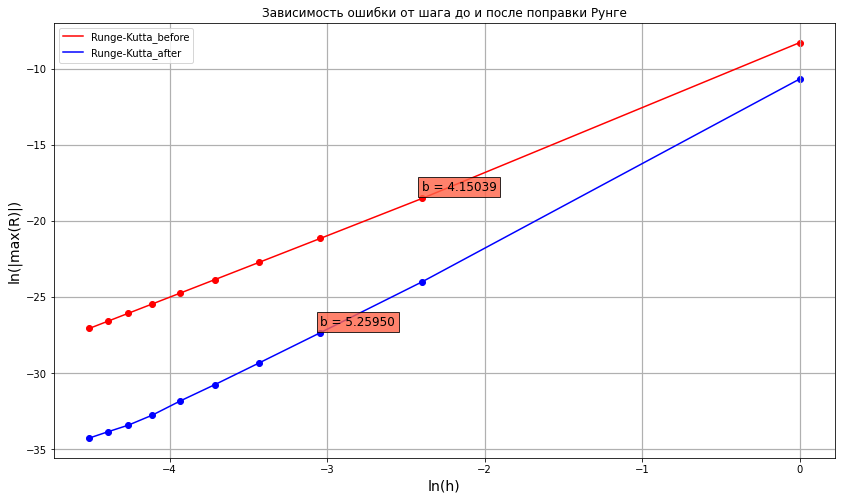

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot, ln_errors_plot0, color="red")
ax.plot(ln_h_plot, ln_errors_plot0, color="red", label='Runge-Kutta_before')
plt.text(ln_h_plot[1], ln_errors_plot0[1] + 0.5, "b = {0:.5f}".format(b[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot, ln_errors_plot1, color="blue")
ax.plot(ln_h_plot, ln_errors_plot1, color="blue", label='Runge-Kutta_after')
plt.text(ln_h_plot[2], ln_errors_plot1[2] + 0.5, "b = {0:.5f}".format(b[1]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(|max(R)|)", fontsize=14)

plt.title("Зависимость ошибки от шага до и после поправки Рунге")
plt.legend()

plt.show()